## Exercises

Q1. Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators
(all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.

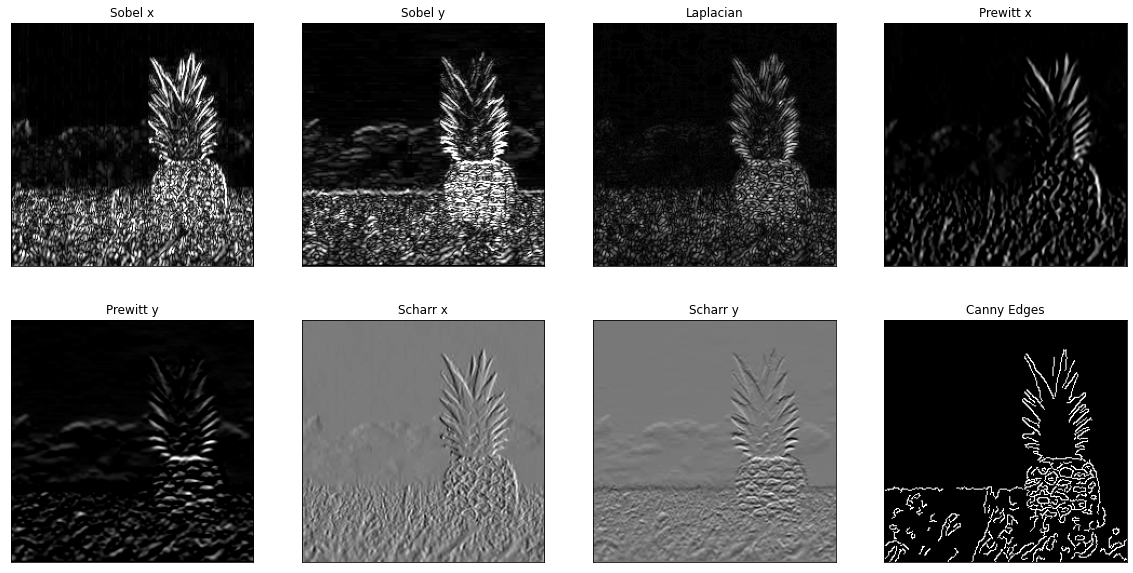

In [38]:
import sys 
assert sys.version_info >=(3,7)

import numpy as np 
import cv2 as cv 
from util_func import *

img = cv.imread("images/pineapple.jfif", 0)
blur = cv.GaussianBlur(img, (5, 5), 0)

# Sobel
sobelx_32F = cv.Sobel(img, cv.CV_32F, 1, 0)
sobelx = cv.convertScaleAbs(sobelx_32F)
sobely_32F = cv.Sobel(img, cv.CV_32F, 0, 1)
sobely = cv.convertScaleAbs(sobely_32F)

# Laplacian 
LoG = cv.Laplacian(blur, cv.CV_16S)
laplacian = cv.convertScaleAbs(LoG)

# Prewitt 
prewitt_x = cv.filter2D(blur, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv.filter2D(blur, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))

# Scharr 
scharr_x = cv.Scharr(img, cv.CV_64F, 1, 0)
scharr_y = cv.Scharr(img, cv.CV_64F, 0, 1) 

# Canny 
canny = cv.Canny(blur, 100, 200)

# Display the results
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(2, 4, 1), plt_img(sobelx, "Sobel x")
plt.subplot(2, 4, 2), plt_img(sobely, "Sobel y")
plt.subplot(2, 4, 3), plt_img(laplacian, "Laplacian")
plt.subplot(2, 4, 4), plt_img(prewitt_x, "Prewitt x")
plt.subplot(2, 4, 5), plt_img(prewitt_y, "Prewitt y")
plt.subplot(2, 4, 6), plt_img(scharr_x, "Scharr x")
plt.subplot(2, 4, 7), plt_img(scharr_y, "Scharr y")
plt.subplot(2, 4, 8), plt_img(canny, "Canny Edges")

plt.show()

In [39]:
# Sobel y detected the cloud better than x 
# Detection with laplacian looks soft
# Prewitt is very blurry 
# Scharr is similir to sobel but has more details
# canny only has lines 

Q2. Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw
bounding boxes on the objects.

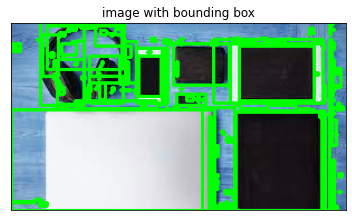

In [15]:
def auto_canny(img, method, sigma = 0.33):
    """Args
    img: source gayscale image
    method: median, otsu and triangle
    sigma: 0.33(default)"""
    if method =="median":
        Th= np.median(img)
    
    elif method =="triangle":
        Th = cv.threshold(img, 0, 255, cv.THRESH_TRIANGLE)[0]
        
    elif method =="otsu":
        Th = cv.threshold(img, 0, 255, cv.THRESH_OTSU)[0]
    
    else:
        raise Exception("Method specified unavailable")
        
    lowTh = (1 - sigma) * Th
    highTh = (1 - sigma) * Th 
    return cv.Canny(img, lowTh, highTh)

img = cv.imread('images/electronic.jfif')
factor = 300/ img.shape[1] # scale factor = output width / image width 
img = cv.resize(img, None, fx=factor, fy=factor)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.bilateralFilter(gray, 7, 19,13)
edge = auto_canny(blur, method = "median")

# Finding contours
contours, _ = cv.findContours(edge, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

img_copy = img.copy()

# Drawing bounding boxes around the detected white objects
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Displaying the image with bounding boxes
plt.figure(figsize=(6, 6))
plt_img(img_copy, title="image with bounding box")
plt.show()

Q3. Isolate the clock with the aid of edge detection and contours' properties. The example result should be as
follow:

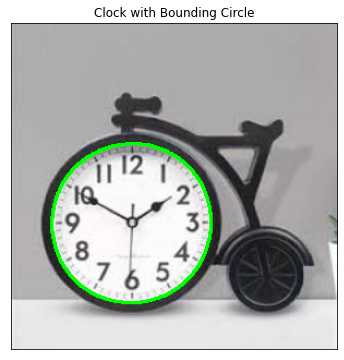

In [33]:
img = cv.imread('images/clock.jpg')
factor = 300/ img.shape[1] # scale factor = output width / image width 
img = cv.resize(img, None, fx=factor, fy=factor)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.bilateralFilter(gray, 7, 19,13)
edge = auto_canny(blur, method = "triangle")

# Find contours 
contours, _ = cv.findContours(edge, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv.contourArea, reverse=True)[:2]

# Analyzing contours to identify the clock 
clock_contour = None
for contour in contours:
    # Fitting an enclosing circle to the contour
    (x, y), radius = cv.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)

    # Calculating circularity based on the area of the contour and the enclosing circle
    area_contour = cv.contourArea(contour)
    area_circle = np.pi * radius ** 2
    circularity = area_contour / area_circle

    # Filtering based on circularity and radius size
    if 0.7 < circularity < 1.1 and 50 < radius < 150:
        clock_contour = contour
        break

# Drawing the identified contour
img_copy = img.copy()
cv.drawContours(img_copy, [clock_contour], -1, (0, 255, 0), 2)

# Displaying the image with bounding circles
plt.figure(figsize=(6, 6))
plt_img(img_copy, title="Clock with Bounding Circle")
plt.show()